In [10]:
import torch
import torch.nn as nn
import numpy as np
class Model(nn.Module): #all models in pytorch need to inherit Module
    def __init__(self, in_dim, hidden_dim, out_dim, *args, **kwargs):
        super(Model, self).__init__(*args, **kwargs)
        self.multi_layer_perceptron = nn.Sequential( #sequential model just reads down the list and executes in order
            #Documentation has the math for this but its somewhat uneccessary this is just transforms 
            #vectors with in_dim elements into vectors with hidden_dim elements
            nn.Linear(in_dim, hidden_dim), 
            
            #this is a function that is zero for all inputs less than zero then y=x for inputs greater than zero this nonlinearity lets us approximate non linear functions
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(), 
            nn.Linear(hidden_dim, out_dim))

        self.sm = nn.Softmax(dim = 1) #function that essentially turns outputs into valid probability distributions

    def forward(self, x): 
        x = self.multi_layer_perceptron(x)
        out = self.sm(x) #if you imagine x as being the same number of elements as the number of actions in the enviroment this would be a distribution over actions that can be sampled from

        return out

In [11]:
model = Model(in_dim = 8, hidden_dim = 32, out_dim = 8) #initialize model in the rl literature this would be the policy (kinda) 

input_vector = torch.rand((10, 8)) #torch is pretty much gpu accelerated numpy that does calc 3 on the backend inut to model is tensor is 10x8 so its a batch size of 10 input size 8
                                     #meaning it is processing 10 observations of length 8
print(input_vector)
output_vector = model.forward(input_vector) #forward pass

print(output_vector) #10x8 
print(torch.sum(output_vector, dim = 1)) #10x8 each row is a valid prob distribution to sample from


tensor([[0.0251, 0.4828, 0.1758, 0.8513, 0.2213, 0.9370, 0.6687, 0.4978],
        [0.1690, 0.6081, 0.6515, 0.5324, 0.9583, 0.4141, 0.4156, 0.3816],
        [0.1539, 0.5214, 0.2101, 0.6254, 0.2279, 0.8998, 0.9704, 0.9213],
        [0.0803, 0.5030, 0.8944, 0.0639, 0.9351, 0.0809, 0.7222, 0.4587],
        [0.0766, 0.8169, 0.5288, 0.8404, 0.2440, 0.3367, 0.0352, 0.7723],
        [0.0758, 0.7004, 0.2918, 0.7519, 0.4798, 0.8184, 0.8485, 0.3783],
        [0.1287, 0.2494, 0.2650, 0.5649, 0.4049, 0.1893, 0.4873, 0.2787],
        [0.5382, 0.4688, 0.5668, 0.5956, 0.3545, 0.9156, 0.7144, 0.1108],
        [0.8593, 0.2779, 0.8095, 0.9759, 0.2830, 0.8591, 0.2372, 0.9271],
        [0.7406, 0.9322, 0.0050, 0.9389, 0.6420, 0.9724, 0.3570, 0.2096]])
tensor([[0.1216, 0.1164, 0.1417, 0.1173, 0.1360, 0.1303, 0.1034, 0.1333],
        [0.1234, 0.1150, 0.1418, 0.1171, 0.1377, 0.1260, 0.1060, 0.1331],
        [0.1214, 0.1147, 0.1443, 0.1187, 0.1338, 0.1324, 0.1034, 0.1313],
        [0.1217, 0.1165, 0.1409, 0.11

In [19]:
#when we want to train the model we do something like this
device = 'cuda' if torch.cuda.is_available() else 'cpu' #cuda is nvidia proprietary gpu parallel computing software and this line of code is at least 50% of why they are worth so much
inputs = torch.rand((1000, 8)).to(device)
model.to(device)
targets = torch.rand((1000, 8)).to(device)
loss_fn = nn.MSELoss() #this is just (output - target)^2 summed over all outputs
optimizer = torch.optim.Adam(params=model.parameters(), lr = 1e-3) #your gonna have to read the docs for this one I cant explain it in a comment but params are what models parameters to 
                                                                    #optimize the parameters are the weights and biases in the linear layers (Ax+b) A is the weight matrix b is the bias
                                                                    #vector you can also add other things to the parameter list in your model if you want learning rate is a hyperparam
                                                                    #that says what size of step should it take

epochs = 10000 #keep this number pretty low if you dont have cuda
losses = []

for i in range(epochs):
    optimizer.zero_grad() #gradient accumulates ever forward pass so if we do not clear the gradient in every epoch it will probably max your memory also the results will be wrong
    output = model.forward(inputs) #forward pass
    loss = loss_fn(output, targets) #calculate loss
    loss.backward() #apply the chain rule about a shit load to figure out how parameters effect output
    optimizer.step() #step with the optimizer
    losses.append(loss.cpu().detach().numpy()) #for visualiztion
    if i % 1000 == 0:
        print(f"epoch {i}")
    
    


epoch 0
epoch 1000
epoch 2000
epoch 3000
epoch 4000
epoch 5000
epoch 6000
epoch 7000
epoch 8000
epoch 9000


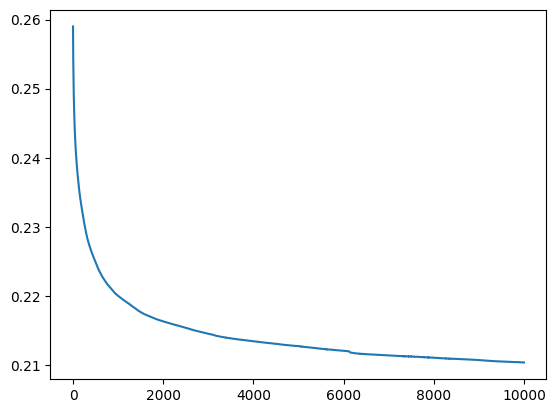

In [20]:
import matplotlib.pyplot as plt #visualization since we r fitting noise to noise this isnt really meaningful except to show the model is being optimized
                                #also in the context of rl loss is not really a good metric really we care about reward
x = np.arange(epochs)

plt.plot(x, losses)
plt.show()